<a href="https://colab.research.google.com/github/mimizonee/MachineLearning/blob/main/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing Dataset

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()
#print(boston)

In [ ]:
boston['feature_names']



array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
boston['data'].shape


(506, 13)

In [ ]:
bost = pd.DataFrame(boston['data'])


In [ ]:
bost.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
bost.columns = boston['feature_names']

In [ ]:
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Normalizing input matrix to keep tha data in the range of -1 to 1

In [ ]:
X = (bost - bost.mean())/(bost.max()-bost.min())

In [ ]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-3.208896e-18,1.148072e-16,-6.812595e-16,-1.189760e-16,6.223338e-16,-1.521044e-15,-3.491388e-16,1.206490e-16,6.406821e-17,1.933017e-16,-2.300312e-15,1.881620e-15,-1.082797e-16
std,9.667929e-02,2.332245e-01,2.514792e-01,2.539940e-01,2.384314e-01,1.346268e-01,2.898956e-01,1.914822e-01,3.785765e-01,3.216357e-01,2.303134e-01,2.302054e-01,1.970492e-01
min,-4.054410e-02,-1.136364e-01,-3.913775e-01,-6.916996e-02,-3.491668e-01,-5.218690e-01,-6.763636e-01,-2.423813e-01,-3.717134e-01,-4.222083e-01,-6.229291e-01,-8.985678e-01,-3.014090e-01
25%,-3.969297e-02,-1.136364e-01,-2.179904e-01,-6.916996e-02,-2.174795e-01,-7.647718e-02,-2.425325e-01,-1.541223e-01,-2.412786e-01,-2.466358e-01,-1.122908e-01,4.716191e-02,-1.573693e-01
50%,-3.773202e-02,-1.136364e-01,-5.303441e-02,-6.916996e-02,-3.435197e-02,-1.458793e-02,9.191657e-02,-5.343258e-02,-1.978003e-01,-1.493075e-01,6.324111e-02,8.766445e-02,-3.568055e-02
75%,7.143872e-04,1.136364e-02,2.552500e-01,-6.916996e-02,1.426028e-01,6.492922e-02,2.626169e-01,1.267068e-01,6.282866e-01,4.919138e-01,1.855815e-01,9.973011e-02,1.187069e-01
max,9.594559e-01,8.863636e-01,6.086225e-01,9.308300e-01,6.508332e-01,4.781310e-01,3.236364e-01,7.576187e-01,6.282866e-01,5.777917e-01,3.770709e-01,1.014322e-01,6.985910e-01


In [ ]:
Y = boston['target']

In [ ]:
Y.shape

(506,)

Splitting the data into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

In [ ]:
X_train.shape

(339, 13)

In [ ]:
X_train = X_train.T

In [ ]:
X_train.shape

(13, 339)

In [ ]:
Y_train.shape

(339,)

In [ ]:
Y_train = np.array([Y_train])

In [ ]:
Y_train.shape

(1, 339)

In [ ]:
X_test = X_test.T

In [ ]:
X_test.shape

(13, 167)

In [ ]:
Y_test = np.array([Y_test])

In [ ]:
Y_test.shape

(1, 167)

Initialization of parameters.

In [ ]:
def initialize(lenw):
  #w = np.random.randn(1, lenw)
  w = np.zeros((1,lenw))
  b = 0
  return w, b


Forward propagation

In [ ]:
def f_prop(X, w, b):
  Z = np.dot(w, X) + b
  return Z

Cost Function

In [ ]:
def cost_function(Z, Y):
  m = len(Y)
  J = (0.5/m)*np.sum(np.square(Z-Y))
  return J

Back Propagation

In [ ]:
def b_prop(X, Y, Z):
  m = len(Y)
  dz = (1/m)*(Z-Y)
  dw = np.dot(dz, X.T)
  db = np.sum(dz)
  return dw, db

Gradient Descent

In [ ]:
def update(w, b, dw, db, lr):
  w = w - (lr*dw)
  b = b - (lr*db)
  return w, b

# Constructing the Model

In [ ]:
def mul_linear_regression(X_train, Y_train, X_test, Y_test, lr, epoch):
  lenw = len(X_train)
  w, b = initialize(lenw)

  cost_train = []
  m_train = len(Y_train)
  m_test = len(Y_test)
  for i in range(1, epoch+1):
    Z_train = f_prop(X_train, w, b)
    cost = cost_function(Z_train, Y_train)
    dw, db = b_prop(X_train, Y_train, Z_train)
    w, b = update(w, b, dw, db, lr)

    if i%10==0:
      cost_train.append(cost)

    MAE_train = (1/m_train)*np.sum(np.abs(Z_train - Y_train))

    Z_test = f_prop(X_test, w, b)
    cost_test = cost_function(Z_test, Y_test)
    MAE_test = (1/m_test)*np.sum(np.abs(Z_test - Y_test))

    print('Epochs '+str(i)+'/'+str(epoch)+': ')
    print('Training cost '+str(cost_train)+'|'+'Validation cost '+str(cost_test))
    print('MAE cost '+str(MAE_train)+'|'+'Validation cost '+str(MAE_test))

  plt.plot(cost_train)  
  plt.xlabel('Iterations per tens')
  plt.ylabel('Training cost')
  plt.title('Learning rate '+str(lr))
  plt.show()

#Training the Model

Epochs 1/500: 
Training cost []|Validation cost 6695409.959647618
MAE cost 7640.1|Validation cost 47059.286579447435
Epochs 2/500: 
Training cost []|Validation cost 1058402258.616247
MAE cost 96174.73742055261|Validation cost 594041.6908042508
Epochs 3/500: 
Training cost []|Validation cost 167297809504.90704
MAE cost 1209300.9705877346|Validation cost 7473028.865908602
Epochs 4/500: 
Training cost []|Validation cost 26434916187411.914
MAE cost 15199880.117395163|Validation cost 93950511.92360085
Epochs 5/500: 
Training cost []|Validation cost 4175404413107747.5
MAE cost 191022152.66917348|Validation cost 1180798407.9354544
Epochs 6/500: 
Training cost []|Validation cost 6.594084670654464e+17
MAE cost 2400517297.495843|Validation cost 14839149931.903606
Epochs 7/500: 
Training cost []|Validation cost 1.0413232216919879e+20
MAE cost 30166004463.98096|Validation cost 186477470397.2346
Epochs 8/500: 
Training cost []|Validation cost 1.6443998457854706e+22
MAE cost 379077305557.85547|Valid

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until


Training cost [5.286062074299099e+24, 5.096810374108415e+46, 4.914334269809669e+68, 4.738391178551618e+90, 4.568747205274133e+112, 4.405176828832566e+134, 4.247462602194676e+156, 4.095394863371118e+178, 3.948771456695169e+200, 3.8073974640812317e+222, 3.6710849459048007e+244, 3.539652691159469e+266, 3.4129259765587983e+288, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]|Validation cost inf
MAE cost 3.0756128331978345e+276|Validation cost 1.901265405395348e+277
Epochs 250/500: 
Training cost [5.286062074299099e+24, 5.096810374108415e+46, 4.914334269809669e+68, 4.738391178551618e+90, 4.568747205274133e+112, 4.405176828832566e+134, 4.247462602194676e+156, 4.095394863371118e+178, 3.948771456695169e+200, 3.8073974640812317e+222, 3.6710849459048007e+244, 3.539652691159469e+266, 3.4129259765587983e+288, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]|Validation cost inf
MAE cost 3.864915250898151e+277|Validation cost 2.3891920276835678e+278
Epochs 251/500: 
Training cost [

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


Epochs 356/500: 
Training cost [5.286062074299099e+24, 5.096810374108415e+46, 4.914334269809669e+68, 4.738391178551618e+90, 4.568747205274133e+112, 4.405176828832566e+134, 4.247462602194676e+156, 4.095394863371118e+178, 3.948771456695169e+200, 3.8073974640812317e+222, 3.6710849459048007e+244, 3.539652691159469e+266, 3.4129259765587983e+288, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan]|Validation cost nan
MAE cost nan|Validation cost nan
Epochs 357/500: 
Training cost [5.286062074299099e+24, 5.096810374108415e+46, 4.914334269809669e+68, 4.738391178551618e+90, 4.568747205274133e+112, 4.405176828832566e+134, 4.247462602194676e+156, 4.095394863371118e+178, 3.948771456695169e+200, 3.8073974640812317e+222, 3.6710849459048007e+244, 3.539652691159469e+266, 3.4129259765587983e+288, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan]|Validation cost nan
MAE cost nan|Validati

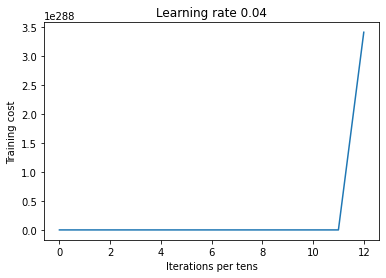

In [ ]:
mul_linear_regression(X_train, Y_train, X_test, Y_test, 0.04, 500)